In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv(r"C:\Users\Dinesh\OneDrive\Documents\Projects_Portfolio\Property_Price_Prediction\Property_Price_Data\Data.csv")

In [3]:
df1.head()

,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [4]:
df1.shape

(14528, 9)

In [5]:
df1.groupby('Name')['Name'].agg('count')

Name
    Madhurangan Apartment ,Ambegaon, Pune                                  1
   Manganahalli    Sriram Layout ,Ullal Uppanagar, Bangalore               1
   sona Building,Bhayandar West, Mumbai                                    1
  Oxford Blues                                                             1
  Sec 2 Pooja apartment Bhosari ,Indrayani Nagar Sector 2, Bhosari,Pune    1
                                                                          ..
xrbia township                                                             1
yadari,Devasthanagalu, Varthur,Bangalore                                   1
yamuna sadan,Vishwakarma Colony, Pul Prahlad Pur,New Delhi                 1
yashwant nagar                                                             1
yesh homes,Nemilichery, Chromepet,Chennai                                  1
Name: Name, Length: 9998, dtype: int64

In [6]:
df2 = df1.drop(['Name','Price_per_SQFT','Description'],axis='columns')
df2.head()

,Property Title,Price,Location,Total_Area,Baths,Balcony
0,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes
1,10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes
2,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No
3,7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes
4,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,3,Yes


In [7]:
df2.isnull().sum()

Property Title    0
Price             0
Location          0
Total_Area        0
Baths             0
Balcony           0
dtype: int64

In [8]:
df2['Property Title'].unique()

array(['4 BHK Flat for sale in Kanathur Reddikuppam, Chennai',
       '10 BHK Independent House for sale in Pozhichalur, Chennai',
       '3 BHK Flat for sale in West Tambaram, Chennai', ...,
       '1 BHK Flat for sale in Geeta Colony, New Delhi',
       '3 BHK Flat for sale in Sector 16 Rohini, New Delhi',
       '1 RK Independent House for sale in Sector 3 Rohini, New Delhi'],
      dtype=object)

In [9]:
df2['bhk']=df2['Property Title'].apply(lambda x:x.split(' ')[0])

In [10]:
df2.head()

,Property Title,Price,Location,Total_Area,Baths,Balcony,bhk
0,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4
1,10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10
2,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3
3,7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7
4,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,3,Yes,2


In [11]:
df2['bhk'].unique()

array(['4', '10', '3', '7', '2', '1', '6', '5', '8', '1.5', '2.5', '9',
       '3.5', '5+', 'Studio', '10.5', 'Shop', '4.5', '9.5', '8.5', '7.5'],
      dtype=object)

In [12]:
df2[df2.bhk==object]

,Property Title,Price,Location,Total_Area,Baths,Balcony,bhk


In [13]:
df2.Total_Area.unique()

array([2583, 7000, 1320, ...,  783,  171,  472], dtype=int64)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [15]:
df2[~df2['bhk'].apply(is_float)]

,Property Title,Price,Location,Total_Area,Baths,Balcony,bhk
1057,"5+ BHK Independent House for sale in Avadi, Ch...",₹1.1 Cr,"Avadi, Chennai",1135,3,No,5+
1181,"5+ BHK Independent House for sale in Avadi, Ch...",₹2.89 Cr,"vinyagapur,Viraraghavapuram, Avadi,Chennai",2400,4,Yes,5+
1186,"Studio Flat for sale in Kelambakkam, Chennai",₹17.0 L,"jasmine springs,Kelambakkam, Chennai",302,1,Yes,Studio
1446,"Shop Flat for sale in Ayapakkam, Chennai",₹15.0 L,"Ayapakkam, Chennai",110,1,Yes,Shop
2512,5+ BHK Independent House for sale in Kithaganu...,₹1.45 Cr,"Kithaganur Colony, Bangalore",1600,3,No,5+
3262,"5+ BHK Independent House for sale in RR Nagar,...",₹3.2 Cr,"RR Nagar, Bangalore",4800,5,Yes,5+
3287,"5+ BHK Independent House for sale in Totagere,...",₹1.54 Cr,"Totagere, Bangalore",1350,3,Yes,5+
3497,Studio Independent House for sale in Yerappana...,₹38.25 L,"Yerappanahalli, Bangalore",1275,3,No,Studio
3544,5+ BHK Independent House for sale in Shivaji N...,₹2.25 Cr,"Sulthangunta, Shivaji Nagar,Bangalore",1500,3,No,5+
3697,5+ BHK Independent House for sale in Bannerugh...,₹7.5 Cr,"Bannerughatta, Bangalore",5500,5,Yes,5+


In [16]:
df3=df2.copy()

In [17]:
df3.head()

,Property Title,Price,Location,Total_Area,Baths,Balcony,bhk
0,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4
1,10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10
2,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3
3,7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7
4,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,3,Yes,2


In [18]:
df4 = df3[df3.bhk != "5+"]
df4.head()
df4.bhk.unique()


array(['4', '10', '3', '7', '2', '1', '6', '5', '8', '1.5', '2.5', '9',
       '3.5', 'Studio', '10.5', 'Shop', '4.5', '9.5', '8.5', '7.5'],
      dtype=object)

In [19]:
df5 = df4[df4.bhk != "Studio"]
df6 = df5[df5.bhk != "Shop"]

In [20]:
df6[~df6['bhk'].apply(is_float)]

,Property Title,Price,Location,Total_Area,Baths,Balcony,bhk


In [21]:
def convert_bhk_float_int(x):
    tokens =x.split('.')
    if len(tokens)==2:
        return(float(tokens[0]))
    try:
        return float(x)
    except:
        return None
               

In [22]:
df7=df6.copy()
df7['bhk']=df7['bhk'].apply(convert_bhk_float_int)

In [23]:
df7.bhk.unique()

array([ 4., 10.,  3.,  7.,  2.,  1.,  6.,  5.,  8.,  9.])

In [24]:
df8=df7.copy()

In [25]:
df8.dtypes

Property Title     object
Price              object
Location           object
Total_Area          int64
Baths               int64
Balcony            object
bhk               float64
dtype: object

In [26]:
df8['bhk']=df8['bhk'].astype(int)

In [27]:
df8.head()

,Property Title,Price,Location,Total_Area,Baths,Balcony,bhk
0,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4
1,10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10
2,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3
3,7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7
4,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,3,Yes,2


In [28]:
df9=df8.drop(['Property Title'],axis='columns')

In [29]:
df9.head()

,Price,Location,Total_Area,Baths,Balcony,bhk
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7
4,₹48.0 L,"Avadi, Chennai",960,3,Yes,2


In [30]:
df9['City']=df9['Location'].apply(lambda x:x.split(',')[-1])

In [31]:
df9.head()

,Price,Location,Total_Area,Baths,Balcony,bhk,City
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4,Chennai
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10,Chennai
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3,Chennai
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7,Chennai
4,₹48.0 L,"Avadi, Chennai",960,3,Yes,2,Chennai


In [32]:
df9.shape

(14492, 7)

In [33]:
df9.City.unique()

array([' Chennai', 'Chennai', 'Bangalore', ' Bangalore', 'Hyderabad',
       ' Hyderabad', 'Mumbai', ' Mumbai', 'Thane', 'Kolkata', ' Kolkata',
       'Pune', ' Pune', ' New Delhi', 'New Delhi'], dtype=object)

In [34]:
df10=df9.copy()

In [35]:
df10['City']=df9['City'].apply(lambda x:x.split(' ')[-1])

In [36]:
df10.head()

,Price,Location,Total_Area,Baths,Balcony,bhk,City
0,₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4,Chennai
1,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10,Chennai
2,₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3,Chennai
3,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7,Chennai
4,₹48.0 L,"Avadi, Chennai",960,3,Yes,2,Chennai


In [37]:
df10.City.unique()

array(['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'Thane', 'Kolkata',
       'Pune', 'Delhi'], dtype=object)

In [38]:
df11=df10.copy()
df11['Price']=df11['Price'].apply(lambda x:x.split('₹')[-1])

In [39]:
df11.head()

,Price,Location,Total_Area,Baths,Balcony,bhk,City
0,1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4,Chennai
1,2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10,Chennai
2,1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3,Chennai
3,3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7,Chennai
4,48.0 L,"Avadi, Chennai",960,3,Yes,2,Chennai


In [40]:
df11.dtypes

Price         object
Location      object
Total_Area     int64
Baths          int64
Balcony       object
bhk            int32
City          object
dtype: object

In [41]:
df11['Cr_Lakh'] = df11.Price.str.contains('Cr')

In [42]:
df11.head()


,Price,Location,Total_Area,Baths,Balcony,bhk,City,Cr_Lakh
0,1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4,Chennai,True
1,2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10,Chennai,True
2,1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3,Chennai,True
3,3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7,Chennai,True
4,48.0 L,"Avadi, Chennai",960,3,Yes,2,Chennai,False


In [43]:
df11['Final_Price']=df11['Price'].apply(lambda x:x.split(' ')[0])

In [44]:
df11.head()

,Price,Location,Total_Area,Baths,Balcony,bhk,City,Cr_Lakh,Final_Price
0,1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4,Chennai,True,1.99
1,2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10,Chennai,True,2.25
2,1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3,Chennai,True,1.0
3,3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7,Chennai,True,3.33
4,48.0 L,"Avadi, Chennai",960,3,Yes,2,Chennai,False,48.0


In [45]:
df12=df11.copy()

In [46]:

df12 = df12[df12.Final_Price != "55.0k"]
df12.head()

,Price,Location,Total_Area,Baths,Balcony,bhk,City,Cr_Lakh,Final_Price
0,1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4,Chennai,True,1.99
1,2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10,Chennai,True,2.25
2,1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3,Chennai,True,1.0
3,3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7,Chennai,True,3.33
4,48.0 L,"Avadi, Chennai",960,3,Yes,2,Chennai,False,48.0


In [47]:
df12.dtypes
df12['Final_Price']=df12['Final_Price'].astype(float)

In [48]:
df12.head()

,Price,Location,Total_Area,Baths,Balcony,bhk,City,Cr_Lakh,Final_Price
0,1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4,Chennai,True,1.99
1,2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10,Chennai,True,2.25
2,1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3,Chennai,True,1.00
3,3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7,Chennai,True,3.33
4,48.0 L,"Avadi, Chennai",960,3,Yes,2,Chennai,False,48.00


In [49]:
df12.dtypes

Price           object
Location        object
Total_Area       int64
Baths            int64
Balcony         object
bhk              int32
City            object
Cr_Lakh           bool
Final_Price    float64
dtype: object

In [50]:
df13=df12.copy()

In [51]:
df13.head()

,Price,Location,Total_Area,Baths,Balcony,bhk,City,Cr_Lakh,Final_Price
0,1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4,Chennai,True,1.99
1,2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10,Chennai,True,2.25
2,1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3,Chennai,True,1.00
3,3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7,Chennai,True,3.33
4,48.0 L,"Avadi, Chennai",960,3,Yes,2,Chennai,False,48.00


In [52]:
df13['Price']=df13['Price'].apply(lambda x:x.split(' ')[-1])

In [53]:
df13.Price.unique()

array(['Cr', 'L', '2.0', 'Lacs', '3.0', '1.0'], dtype=object)

In [54]:
df13.head()

,Price,Location,Total_Area,Baths,Balcony,bhk,City,Cr_Lakh,Final_Price
0,Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4,Chennai,True,1.99
1,Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10,Chennai,True,2.25
2,Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3,Chennai,True,1.00
3,Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7,Chennai,True,3.33
4,L,"Avadi, Chennai",960,3,Yes,2,Chennai,False,48.00


In [55]:
df13.Cr_Lakh.replace({False:1, True:100},inplace=True)

In [56]:
df13.head()

,Price,Location,Total_Area,Baths,Balcony,bhk,City,Cr_Lakh,Final_Price
0,Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4,Chennai,100,1.99
1,Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10,Chennai,100,2.25
2,Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3,Chennai,100,1.00
3,Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7,Chennai,100,3.33
4,L,"Avadi, Chennai",960,3,Yes,2,Chennai,1,48.00


In [57]:
df13.dtypes

Price           object
Location        object
Total_Area       int64
Baths            int64
Balcony         object
bhk              int32
City            object
Cr_Lakh          int64
Final_Price    float64
dtype: object

In [58]:
df13['Cr_Lakh']=df13['Cr_Lakh'].astype(float)

In [59]:
df13.dtypes

Price           object
Location        object
Total_Area       int64
Baths            int64
Balcony         object
bhk              int32
City            object
Cr_Lakh        float64
Final_Price    float64
dtype: object

In [60]:
df13.Final_Price=df13.Final_Price*df13.Cr_Lakh

In [61]:
df13.head()

,Price,Location,Total_Area,Baths,Balcony,bhk,City,Cr_Lakh,Final_Price
0,Cr,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4,Chennai,100.0,199.0
1,Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10,Chennai,100.0,225.0
2,Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3,Chennai,100.0,100.0
3,Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7,Chennai,100.0,333.0
4,L,"Avadi, Chennai",960,3,Yes,2,Chennai,1.0,48.0


In [62]:
df14=df13.drop(['Cr_Lakh','Price'],axis='columns')

In [63]:
df14.head()

,Location,Total_Area,Baths,Balcony,bhk,City,Final_Price
0,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4,Chennai,199.0
1,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10,Chennai,225.0
2,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3,Chennai,100.0
3,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7,Chennai,333.0
4,"Avadi, Chennai",960,3,Yes,2,Chennai,48.0


In [64]:
df14['Locality']=df14['Location'].apply(lambda x:x.split(',')[-2])

In [65]:
df14.head()

,Location,Total_Area,Baths,Balcony,bhk,City,Final_Price,Locality
0,"Kanathur Reddikuppam, Chennai",2583,4,Yes,4,Chennai,199.0,Kanathur Reddikuppam
1,"Ramanathan Nagar, Pozhichalur,Chennai",7000,6,Yes,10,Chennai,225.0,Pozhichalur
2,"Kasthuribai Nagar, West Tambaram,Chennai",1320,3,No,3,Chennai,100.0,West Tambaram
3,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,5,Yes,7,Chennai,333.0,Triplicane
4,"Avadi, Chennai",960,3,Yes,2,Chennai,48.0,Avadi


In [66]:
df14.Location.unique()

array(['Kanathur Reddikuppam, Chennai',
       'Ramanathan Nagar, Pozhichalur,Chennai',
       'Kasthuribai Nagar, West Tambaram,Chennai', ...,
       'Bulder floor,Jaitpur, New Delhi',
       'Krishna Park Extension, Tilak Nagar,New Delhi',
       'Lig flat rohini,Sector 16E, Sector 16 Rohini,New Delhi'],
      dtype=object)

In [67]:
df14.Locality.unique()

array(['Kanathur Reddikuppam', ' Pozhichalur', ' West Tambaram', ...,
       'Kapashera', ' Delhi Race Club', ' Ramesh Nagar'], dtype=object)

In [68]:
df15=df14.drop(['Location'],axis='columns')

In [69]:
df15.head()

,Total_Area,Baths,Balcony,bhk,City,Final_Price,Locality
0,2583,4,Yes,4,Chennai,199.0,Kanathur Reddikuppam
1,7000,6,Yes,10,Chennai,225.0,Pozhichalur
2,1320,3,No,3,Chennai,100.0,West Tambaram
3,4250,5,Yes,7,Chennai,333.0,Triplicane
4,960,3,Yes,2,Chennai,48.0,Avadi


In [70]:
df15['Price_per_sqft']=df1['Price_per_SQFT']

In [71]:
df15.head()

,Total_Area,Baths,Balcony,bhk,City,Final_Price,Locality,Price_per_sqft
0,2583,4,Yes,4,Chennai,199.0,Kanathur Reddikuppam,7700.0
1,7000,6,Yes,10,Chennai,225.0,Pozhichalur,3210.0
2,1320,3,No,3,Chennai,100.0,West Tambaram,7580.0
3,4250,5,Yes,7,Chennai,333.0,Triplicane,7840.0
4,960,3,Yes,2,Chennai,48.0,Avadi,5000.0


In [72]:
len(df15.Locality.unique())

2241

In [73]:
df15.Locality=df15.Locality.apply(lambda x :x.strip())

In [74]:
location_stats=df15.groupby('Locality')['Locality'].agg('count').sort_values(ascending=False)
location_stats

Locality
Electronic City        103
Hadapsar                96
Mira Road East          90
Chandapura              69
Talegaon Dabhade        68
                      ... 
Balavinayagar Nagar      1
Irandankattalai          1
Patas                    1
Irumbuliyur              1
Kundur                   1
Name: Locality, Length: 1787, dtype: int64

In [75]:
len(location_stats[location_stats<=10])

1350

In [76]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

Locality
Anand Nagar            10
Hingne Khurd           10
Pudupakkam             10
Preet Vihar            10
Ariadaha               10
                       ..
Balavinayagar Nagar     1
Irandankattalai         1
Patas                   1
Irumbuliyur             1
Kundur                  1
Name: Locality, Length: 1350, dtype: int64

In [77]:
df15.Locality=df15.Locality.apply(lambda x:'other'if x in location_stats_less_than_10 else x)

In [78]:
len(df15.Locality.unique())

438

In [79]:
df15[df15.Total_Area/df15.bhk<300]

,Total_Area,Baths,Balcony,bhk,City,Final_Price,Locality,Price_per_sqft
89,598,2,Yes,2,Chennai,29.5,Madambakkam,4930.0
108,518,2,No,2,Chennai,40.4,other,7800.0
113,560,2,Yes,2,Chennai,45.0,Kodambakkam,8040.0
118,547,2,Yes,2,Chennai,41.0,other,7500.0
193,561,2,Yes,2,Chennai,50.0,other,8910.0
...,...,...,...,...,...,...,...,...
14516,450,2,No,2,Delhi,45.0,other,10000.0
14519,465,2,No,2,Delhi,28.0,Kirari Suleman Nagar,6020.0
14521,200,1,No,1,Delhi,9.0,Jaitpur,4500.0
14522,405,2,Yes,7,Delhi,55.0,other,13580.0


In [80]:
df16=df15.copy()

In [81]:
df16.head()
df16.shape

(14491, 8)

In [82]:
df17=df16[df16.Total_Area/df15.bhk>300]
df17.shape

(12716, 8)

In [83]:
df17.Final_Price.describe()

count    12716.000000
mean       108.914548
std        192.016652
min          1.000000
25%         39.000000
50%         65.000000
75%        115.000000
max       8400.000000
Name: Final_Price, dtype: float64

In [84]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('Locality'):
        m=np.mean(subdf.Final_Price)
        st=np.std(subdf.Final_Price)
        reduced_df=subdf[(subdf.Final_Price>(m-st)) & (subdf.Final_Price<=(m+st))]
        df_out=pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out
def remove_pps_outliers1(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('Locality'):
        m=np.mean(subdf.Price_per_sqft)
        st=np.std(subdf.Price_per_sqft)
        reduced_df=subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out
df18=remove_pps_outliers(df17)
df19=remove_pps_outliers1(df18)
df19.shape

(8995, 8)

In [85]:
def plot_scatter_chart(df,Locality):
    bhk2=df[(df.Locality==Locality) & (df.bhk==2)]
    bhk3=df[(df.Locality==Locality) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.Total_Area,bhk2.Final_Price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.Total_Area,bhk3.Final_Price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(Locality)
    plt.legend()

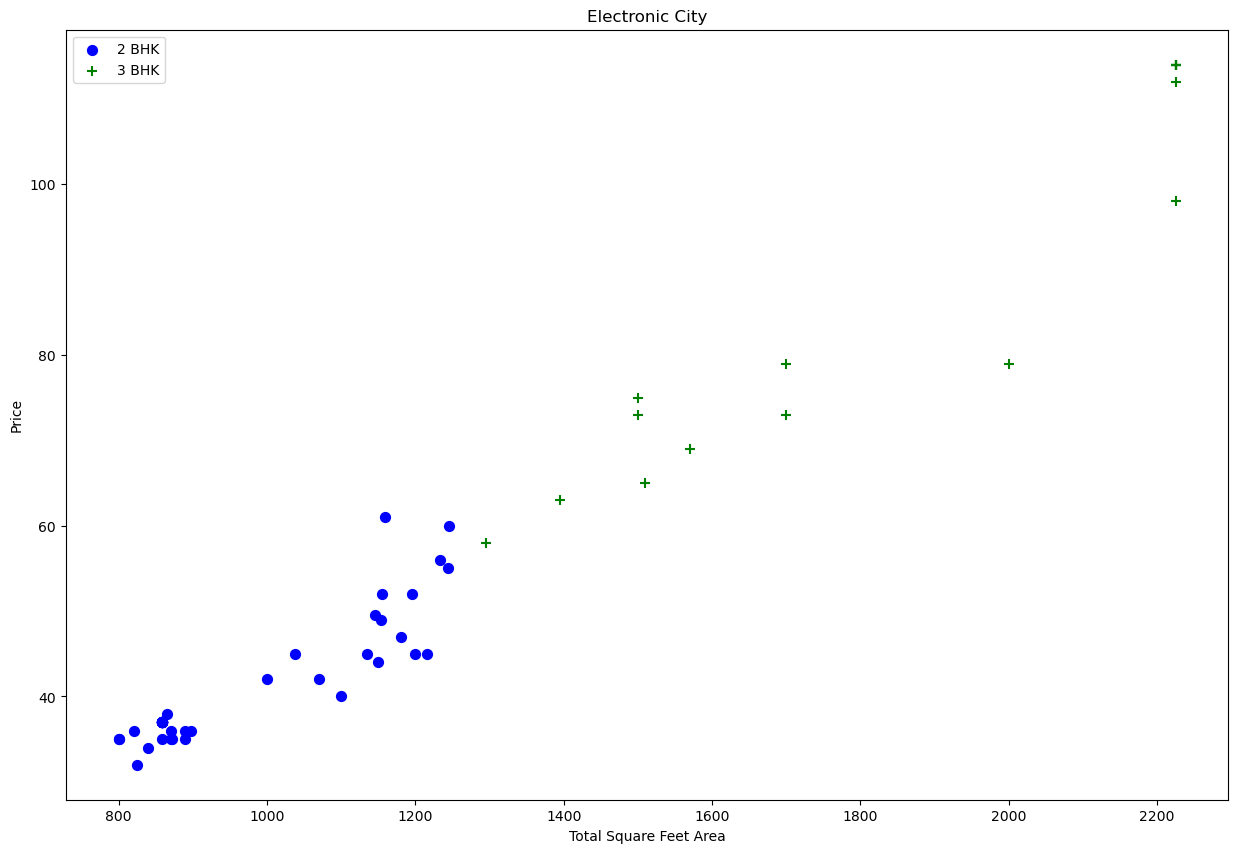

In [86]:
plot_scatter_chart(df19,"Electronic City")

In [87]:
df18.Baths.unique()
df18

,Total_Area,Baths,Balcony,bhk,City,Final_Price,Locality,Price_per_sqft
0,3000,4,Yes,6,Bangalore,120.0,Abbigere,4000.0
1,915,3,Yes,2,Bangalore,56.0,Abbigere,6120.0
2,1270,3,No,2,Bangalore,56.0,Abbigere,4410.0
3,1500,3,Yes,3,Bangalore,70.0,Abbigere,4670.0
4,1200,3,No,3,Bangalore,65.0,Abbigere,5420.0
...,...,...,...,...,...,...,...,...
10894,1150,3,Yes,2,Delhi,110.0,other,9560.0
10895,963,3,No,3,Delhi,35.0,other,3630.0
10896,472,2,Yes,1,Delhi,14.0,other,2970.0
10897,378,1,Yes,1,Delhi,30.0,other,7940.0


In [88]:
df19[df19.Baths>df19.bhk+3]

,Total_Area,Baths,Balcony,bhk,City,Final_Price,Locality,Price_per_sqft
822,800,6,No,2,Bangalore,35.00,Bommasandra,4380.0
1013,800,6,Yes,2,Mumbai,159.00,Chembur,19880.0
1039,800,6,No,2,Chennai,35.80,Chengalpattu,4470.0
1160,800,6,No,2,Mumbai,134.00,Dahisar West,16750.0
1774,800,6,No,2,Bangalore,56.00,Hebbal,7000.0
2249,800,6,Yes,2,Pune,75.00,Kasba Peth,9380.0
2287,800,6,Yes,2,Bangalore,82.80,Kengeri,10350.0
2672,800,6,Yes,2,Pune,30.00,Lohegaon,3750.0
2899,800,6,Yes,2,Chennai,37.00,Maraimalai Nagar,4630.0
2914,5000,5,Yes,1,Bangalore,230.00,Marathahalli,4600.0


In [89]:
df20=df19[df19.Baths<df19.bhk+3]
df20.shape

(8909, 8)

In [90]:
df20.dtypes

Total_Area          int64
Baths               int64
Balcony            object
bhk                 int32
City               object
Final_Price       float64
Locality           object
Price_per_sqft    float64
dtype: object

In [91]:
df21=df20.copy()

In [92]:
df21["City"] = df21["Locality"].str.cat(df21["City"], sep = " ")

In [93]:
df21.head()

,Total_Area,Baths,Balcony,bhk,City,Final_Price,Locality,Price_per_sqft
0,1270,3,No,2,Abbigere Bangalore,56.0,Abbigere,4410.0
1,1500,3,Yes,3,Abbigere Bangalore,70.0,Abbigere,4670.0
2,1200,3,No,3,Abbigere Bangalore,65.0,Abbigere,5420.0
3,3000,6,Yes,5,Abbigere Bangalore,125.0,Abbigere,4170.0
4,1600,3,Yes,3,Abbigere Bangalore,80.0,Abbigere,5000.0


In [94]:
df22=df21.copy()

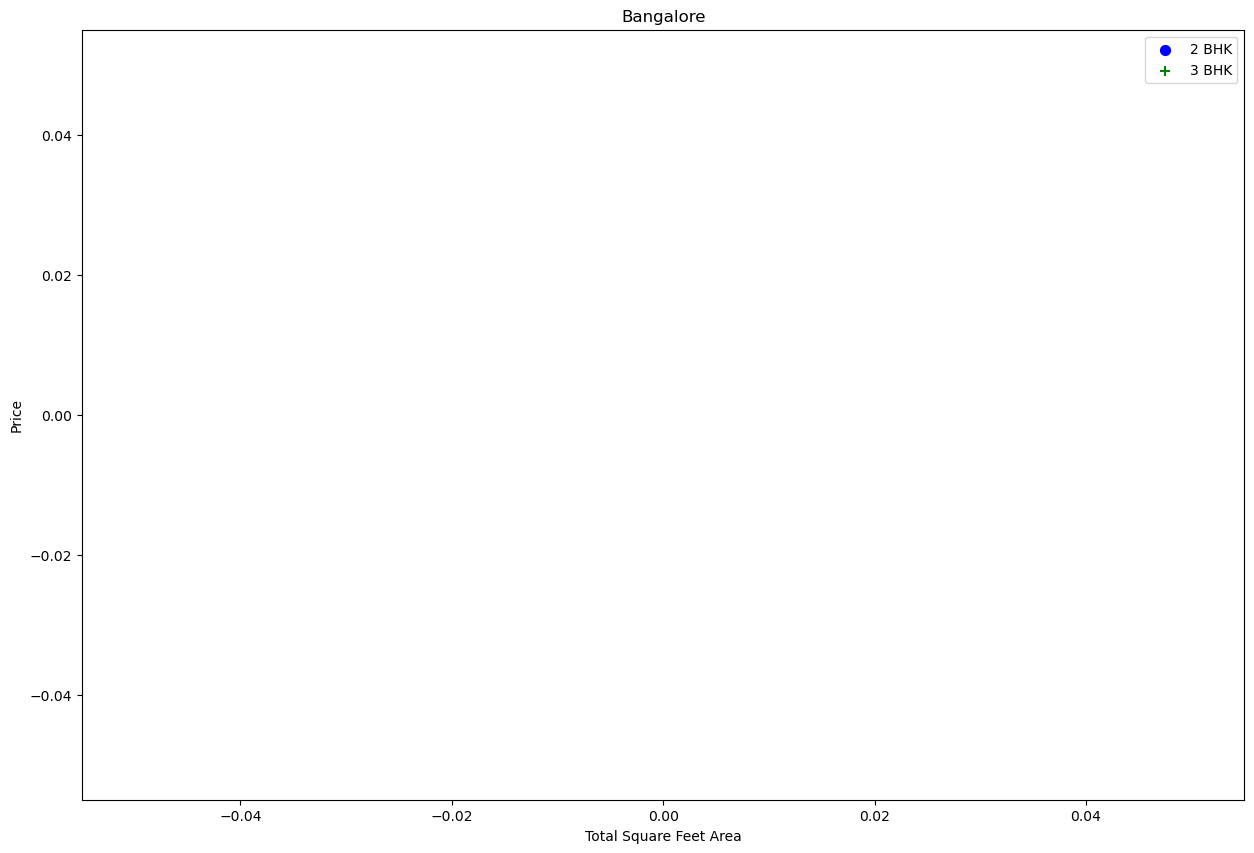

In [95]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for City, City_df in df.groupby('City'):
        bhk_stats={}
        for bhk, bhk_df in City_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.Final_Price),
                'std':np.std(bhk_df.Final_Price),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in City_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Final_Price<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for City, City_df in df.groupby('City'):
        bhk_stats={}
        for bhk, bhk_df in City_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.Price_per_sqft),
                'std':np.std(bhk_df.Price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in City_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df23=remove_bhk_outliers(df22)
df24=remove_bhk_outliers(df23)
df24.head(4)
df24.shape
plot_scatter_chart(df24,"Bangalore")

In [96]:
df25=df24.drop(['Price_per_sqft','Locality','Balcony'],axis='columns')
df25.head()

,Total_Area,Baths,bhk,City,Final_Price
0,1270,3,2,Abbigere Bangalore,56.0
1,1500,3,3,Abbigere Bangalore,70.0
2,1200,3,3,Abbigere Bangalore,65.0
3,3000,6,5,Abbigere Bangalore,125.0
4,1600,3,3,Abbigere Bangalore,80.0


In [97]:
dummies=pd.get_dummies(df25.City)

In [98]:
dummies.head()
dummies1=dummies.drop(['other Chennai','other Delhi','other Hyderabad','other Kolkata','other Mumbai','other Pune','other Thane'],axis='columns')

In [99]:
df26=pd.concat([df25,dummies1.drop('other Bangalore',axis='columns')],axis='columns')

In [100]:
df26.head(3)

,Total_Area,Baths,bhk,City,Final_Price,Abbigere Bangalore,Akshayanagar Bangalore,Akurdi Pune,Alandi Pune,Ambattur Chennai,...,Wazirabad Delhi,West Tambaram Chennai,Whitefield Bangalore,Wilson Garden Bangalore,Yelahanka Bangalore,Yelahanka New Town Bangalore,Yemalur Bangalore,Yerawada Pune,Yeshwanthpur Bangalore,Yewalewadi Pune
0,1270,3,2,Abbigere Bangalore,56.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500,3,3,Abbigere Bangalore,70.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200,3,3,Abbigere Bangalore,65.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df27=df26.drop('City',axis='columns')

In [102]:
df27.shape

(6204, 444)

In [103]:
X =df27.drop('Final_Price',axis='columns')
X.head()

,Total_Area,Baths,bhk,Abbigere Bangalore,Akshayanagar Bangalore,Akurdi Pune,Alandi Pune,Ambattur Chennai,Ambegaon Budruk Pune,Ambegaon Pathar Pune,...,Wazirabad Delhi,West Tambaram Chennai,Whitefield Bangalore,Wilson Garden Bangalore,Yelahanka Bangalore,Yelahanka New Town Bangalore,Yemalur Bangalore,Yerawada Pune,Yeshwanthpur Bangalore,Yewalewadi Pune
0,1270,3,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3000,6,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1600,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
y =df27.Final_Price
y.head(3)

0    56.0
1    70.0
2    65.0
Name: Final_Price, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X.values,y,test_size=0.2,random_state=10)

In [106]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6933187859365837

In [107]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.67662993, 0.67965613, 0.62975858, 0.63343135, 0.62992297])

In [108]:
def predict_price(location, Total_Area, bhk, Baths):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=Total_Area
    x[1]=bhk
    x[2]=Baths
    if loc_index>=0:
        x[loc_index]=1
        
    return lr_clf.predict([x])[0]

In [109]:
predict_price('Electronic City Bangalore', 1800, 4, 4)

98.26023522368607

In [110]:
X.columns

Index(['Total_Area', 'Baths', 'bhk', 'Abbigere Bangalore',
       'Akshayanagar Bangalore', 'Akurdi Pune', 'Alandi Pune',
       'Ambattur Chennai', 'Ambegaon Budruk Pune', 'Ambegaon Pathar Pune',
       ...
       'Wazirabad Delhi', 'West Tambaram Chennai', 'Whitefield Bangalore',
       'Wilson Garden Bangalore', 'Yelahanka Bangalore',
       'Yelahanka New Town Bangalore', 'Yemalur Bangalore', 'Yerawada Pune',
       'Yeshwanthpur Bangalore', 'Yewalewadi Pune'],
      dtype='object', length=443)

In [112]:
predict_price('Abbigere Bangalore', 2200, 2, 4)

81.1639586390526

In [ ]:
import pickle
with open('property_price_prediction.pickle','wb')as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns ={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w")as f:
    f.write(json.dumps(columns))